In [38]:
# Imports
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import ranksums

def convert_sums_frame(sums_object, columns):
    frame_ = pd.DataFrame(sums_object)
    frame_.reset_index(inplace=True)
    frame_.columns = columns
    return frame_

##Importando base de dados

* total_bill - total da conta
* tip - valor da gorjeta
* dessert - se pediu sobremesa ou não
* day - dia de seamana 
* time - hora que foi pedido 
* size - quantidade de pessoas

In [2]:
dados = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Datascience/Data Visualization com seaborn/tips.csv')
dados

,total_bill,tip,dessert,day,time,size
0,16.99,1.01,No,Sun,Dinner,2
1,10.34,1.66,No,Sun,Dinner,3
2,21.01,3.50,No,Sun,Dinner,3
3,23.68,3.31,No,Sun,Dinner,2
4,24.59,3.61,No,Sun,Dinner,4
...,...,...,...,...,...,...
239,29.03,5.92,No,Sat,Dinner,3
240,27.18,2.00,Yes,Sat,Dinner,2
241,22.67,2.00,Yes,Sat,Dinner,2
242,17.82,1.75,No,Sat,Dinner,2


## Tradução da base

In [3]:
dados.columns

Index(['total_bill', 'tip', 'dessert', 'day', 'time', 'size'], dtype='object')

In [4]:
novas_c = {
    'total_bill' : 'valor_da_conta',
    'tip' : 'gorjeta',
    'dessert':'sobremesa',
    'day': 'dia_da_semana',
    'time': 'hora_do_dia',
    'size': 'total_de_pessoas'
}

In [5]:
gorjetas = dados.rename(columns = novas_c)

In [6]:
gorjetas.sobremesa.unique()

array(['No', 'Yes'], dtype=object)

In [7]:
sim_nao = {
    'No': 'N',
     'Yes': 'S'
}

In [8]:
gorjetas.sobremesa = gorjetas.sobremesa.map(sim_nao)

In [9]:
gorjetas.sobremesa.unique()

array(['N', 'S'], dtype=object)

In [10]:
gorjetas.head(1)

,valor_da_conta,gorjeta,sobremesa,dia_da_semana,hora_do_dia,total_de_pessoas
0,16.99,1.01,N,Sun,Dinner,2


In [11]:
gorjetas.dia_da_semana.unique()

array(['Sun', 'Sat', 'Thur', 'Fri'], dtype=object)

In [12]:
dias = {
    'Sun':'Domingo', 
    'Sat':'Sabado', 
    'Thur':'Quinta', 
    'Fri':'Sexta'
}

In [13]:
gorjetas.dia_da_semana = gorjetas.dia_da_semana.map(dias)

In [14]:
gorjetas.head(1)

,valor_da_conta,gorjeta,sobremesa,dia_da_semana,hora_do_dia,total_de_pessoas
0,16.99,1.01,N,Domingo,Dinner,2


In [15]:
gorjetas.hora_do_dia.unique()

array(['Dinner', 'Lunch'], dtype=object)

In [16]:
hora = {
    'Dinner':'Jantar', 
    'Lunch':'Almoço'
}

In [17]:
gorjetas.hora_do_dia = gorjetas.hora_do_dia.map(hora)

In [18]:
gorjetas.head()

,valor_da_conta,gorjeta,sobremesa,dia_da_semana,hora_do_dia,total_de_pessoas
0,16.99,1.01,N,Domingo,Jantar,2
1,10.34,1.66,N,Domingo,Jantar,3
2,21.01,3.50,N,Domingo,Jantar,3
3,23.68,3.31,N,Domingo,Jantar,2
4,24.59,3.61,N,Domingo,Jantar,4


## Análise 1 - Valor da conta e gorjeta

In [19]:
gorjetas.columns

Index(['valor_da_conta', 'gorjeta', 'sobremesa', 'dia_da_semana',
       'hora_do_dia', 'total_de_pessoas'],
      dtype='object')

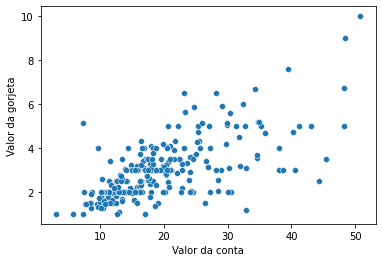

In [20]:
plot = sns.scatterplot(x='valor_da_conta',y='gorjeta',data=gorjetas)
plot.set(xlabel='Valor da conta',ylabel='Valor da gorjeta')
plt.show()

In [21]:
# Não possuí valores nulos
gorjetas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   valor_da_conta    244 non-null    float64
 1   gorjeta           244 non-null    float64
 2   sobremesa         244 non-null    object 
 3   dia_da_semana     244 non-null    object 
 4   hora_do_dia       244 non-null    object 
 5   total_de_pessoas  244 non-null    int64  
dtypes: float64(2), int64(1), object(3)
memory usage: 11.6+ KB


## Criando campo porcentagem

In [22]:
gorjetas.head(1)

,valor_da_conta,gorjeta,sobremesa,dia_da_semana,hora_do_dia,total_de_pessoas
0,16.99,1.01,N,Domingo,Jantar,2


In [23]:
gorjetas['porcentagem'] = (gorjetas['gorjeta']/ gorjetas['valor_da_conta']).round(2)

In [24]:
gorjetas.head(1)

,valor_da_conta,gorjeta,sobremesa,dia_da_semana,hora_do_dia,total_de_pessoas,porcentagem
0,16.99,1.01,N,Domingo,Jantar,2,0.06


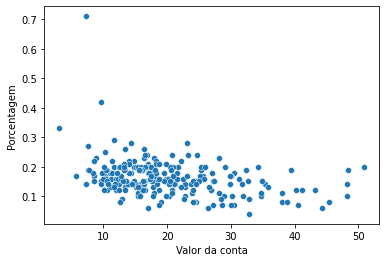

In [25]:
plot = sns.scatterplot(x='valor_da_conta',y='porcentagem',data=gorjetas)
plot.set(xlabel='Valor da conta',ylabel='Porcentagem')
plt.show()

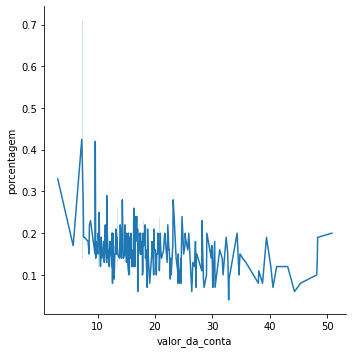

In [26]:
plot = sns.relplot(data=gorjetas,x='valor_da_conta',y='porcentagem',kind='line')
plt.show()

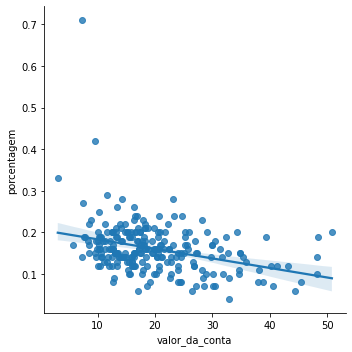

In [27]:
plot = sns.lmplot(data=gorjetas,x='valor_da_conta',y='porcentagem')
plt.show()

## Análise 2 - Sobremesa x Valor da gorjeta

In [28]:
gorjetas[gorjetas.sobremesa=='S'].describe()

,valor_da_conta,gorjeta,total_de_pessoas,porcentagem
count,93.000000,93.000000,93.000000,93.000000
mean,20.756344,3.008710,2.408602,0.163226
std,9.832154,1.401468,0.810751,0.085060
min,3.070000,1.000000,1.000000,0.040000
25%,13.420000,2.000000,2.000000,0.110000
50%,17.920000,3.000000,2.000000,0.150000
75%,26.860000,3.680000,3.000000,0.200000
max,50.810000,10.000000,5.000000,0.710000


In [29]:
gorjetas[gorjetas.sobremesa=='N'].describe()

,valor_da_conta,gorjeta,total_de_pessoas,porcentagem
count,151.000000,151.000000,151.000000,151.000000
mean,19.188278,2.991854,2.668874,0.159536
std,8.255582,1.377190,1.017984,0.039889
min,7.250000,1.000000,1.000000,0.060000
25%,13.325000,2.000000,2.000000,0.140000
50%,17.590000,2.740000,2.000000,0.160000
75%,22.755000,3.505000,3.000000,0.185000
max,48.330000,9.000000,6.000000,0.290000


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


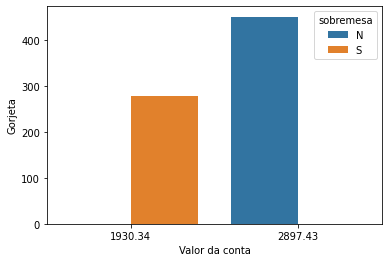

In [30]:
temp = gorjetas.groupby('sobremesa')['valor_da_conta','gorjeta'].sum()
temp = convert_sums_frame(temp, ['sobremesa','valor_da_conta','gorjeta'])

plot = sns.barplot(data=temp,x='valor_da_conta',y='gorjeta',hue='sobremesa')
plot.set(xlabel='Valor da conta',ylabel='Gorjeta')
plt.show()

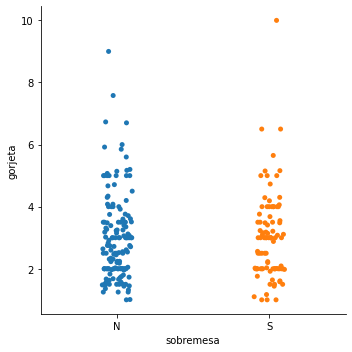

In [31]:
temp = sns.catplot(x='sobremesa',y='gorjeta',data=gorjetas)

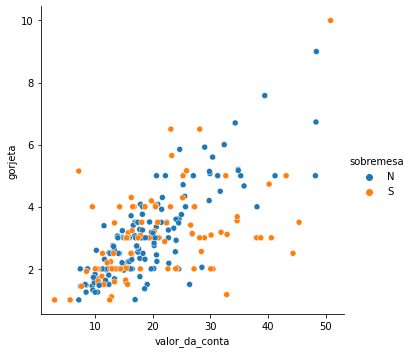

In [32]:
temp = sns.relplot(x='valor_da_conta',y='gorjeta',hue='sobremesa',data=gorjetas)

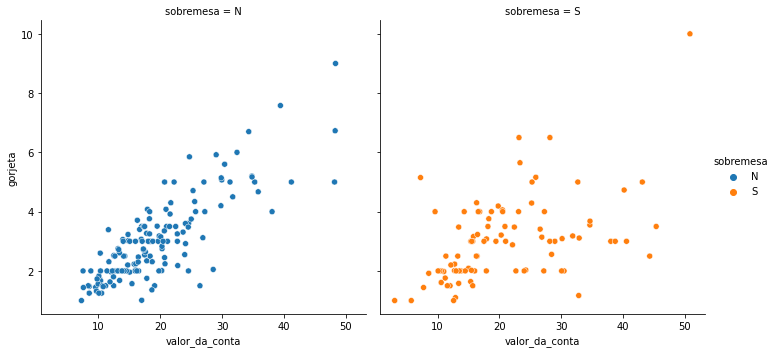

In [33]:
temp = sns.relplot(x='valor_da_conta',y='gorjeta',hue='sobremesa',col='sobremesa',data=gorjetas)

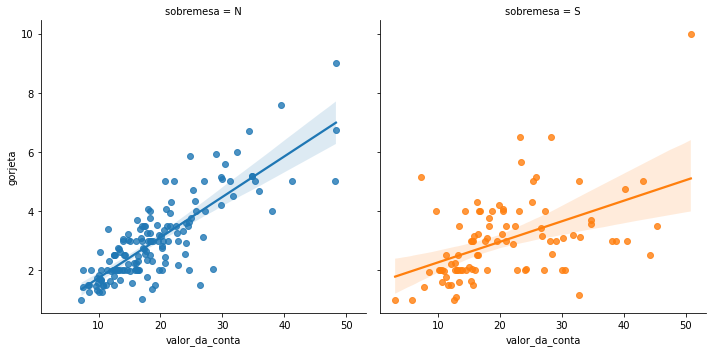

In [34]:
temp = sns.lmplot(x='valor_da_conta',y='gorjeta',hue='sobremesa',col='sobremesa',data=gorjetas)

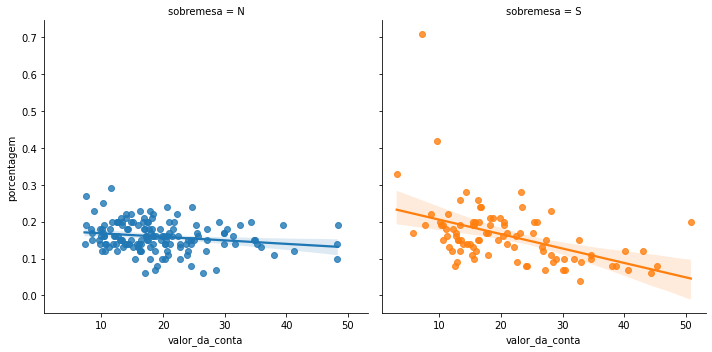

In [35]:
temp = sns.lmplot(x='valor_da_conta',y='porcentagem',hue='sobremesa',col='sobremesa',data=gorjetas)

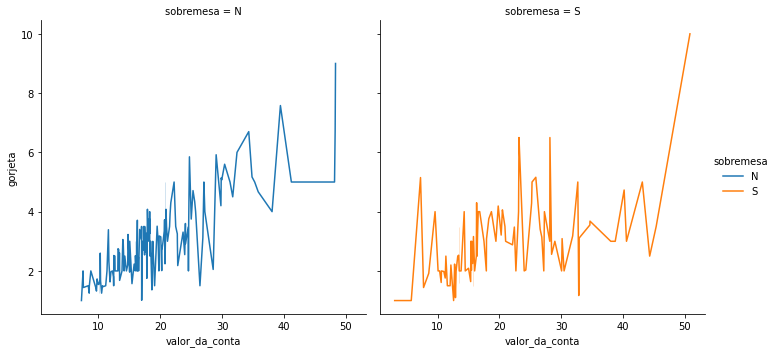

In [37]:
temp = sns.relplot(x='valor_da_conta',y='gorjeta',hue='sobremesa',col='sobremesa',kind='line',data=gorjetas)

### Teste de hipótese


* Hnull -  A dsistribuição da taxa da gorjeta é a mesma nos dois grupos

* Halt - A dsistribuição da taxa da gorjeta não é a mesma nos dois grupos

* Para a hipótese alternativa ser aceita o "pvalue" deverá ser igual ou menor a 0.05

O p-value representa a probabilidade daquela amostra ter acontecido dentro da população. Se a chance é pequena, geralmente p-value < 0,05, representa que um evento muito raro aconteceu, então optamos por descartar a hipótese nula, e dizer que ela pode não ser verdade.

In [45]:
sobremesa = gorjetas.query('sobremesa == "S"').porcentagem

In [41]:
sem_sobremesa = gorjetas.query('sobremesa == "N"').porcentagem

In [43]:
r = ranksums(sobremesa,sem_sobremesa)

In [44]:
print(f'O valor do p-value é {r.pvalue}')

O valor do p-value é 0.5266635660124415


## Análise 3 - Dia da semana

In [47]:
gorjetas.dia_da_semana.unique()

array(['Domingo', 'Sabado', 'Quinta', 'Sexta'], dtype=object)

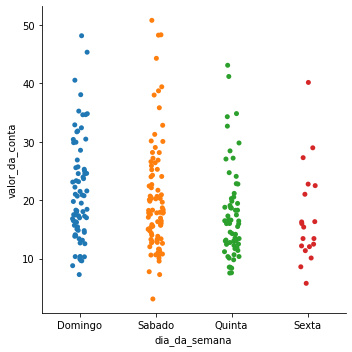

In [49]:
temp = sns.catplot(x='dia_da_semana',y='valor_da_conta',data=gorjetas)

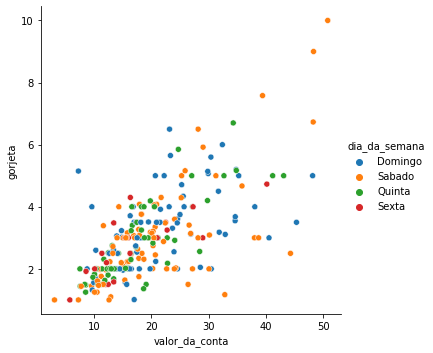

In [50]:
temp = sns.relplot(x='valor_da_conta',y='gorjeta',hue='dia_da_semana',data=gorjetas)

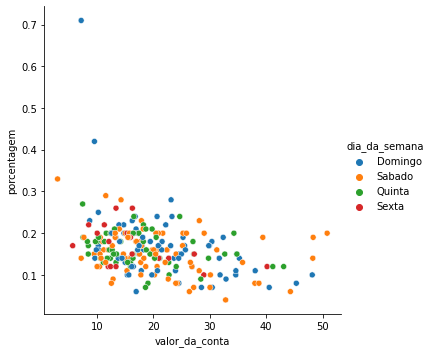

In [51]:
temp = sns.relplot(x='valor_da_conta',y='porcentagem',hue='dia_da_semana',data=gorjetas)

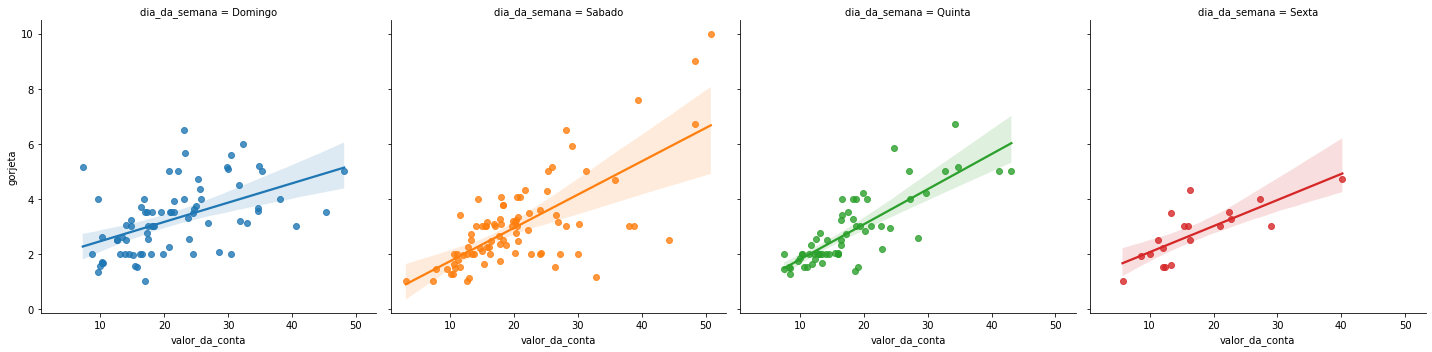

In [52]:
temp = sns.lmplot(x='valor_da_conta',y='gorjeta',hue='dia_da_semana',col='dia_da_semana',data=gorjetas)

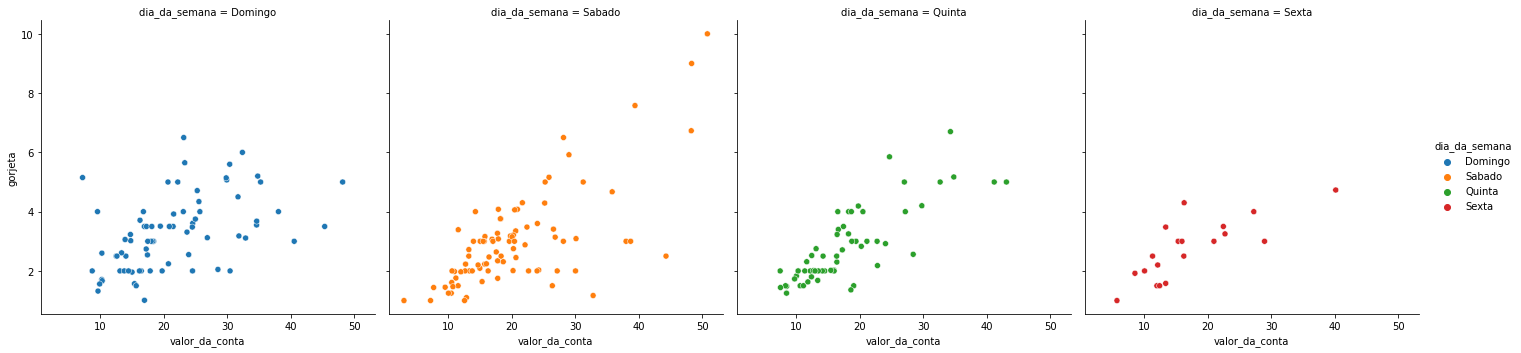

In [53]:
temp = sns.relplot(x='valor_da_conta',y='gorjeta',hue='dia_da_semana',col='dia_da_semana',data=gorjetas)

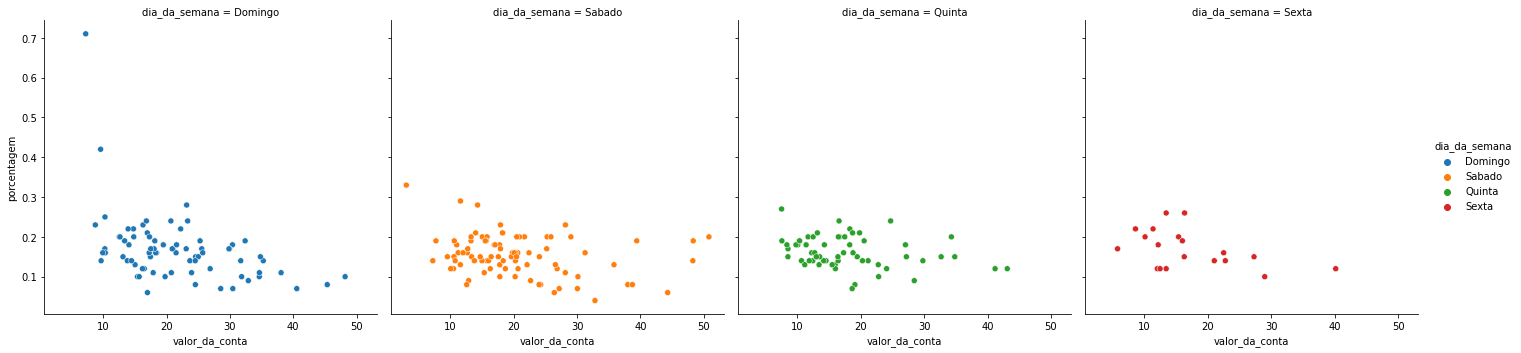

In [54]:
temp = sns.relplot(x='valor_da_conta',y='porcentagem',hue='dia_da_semana',col='dia_da_semana',data=gorjetas)

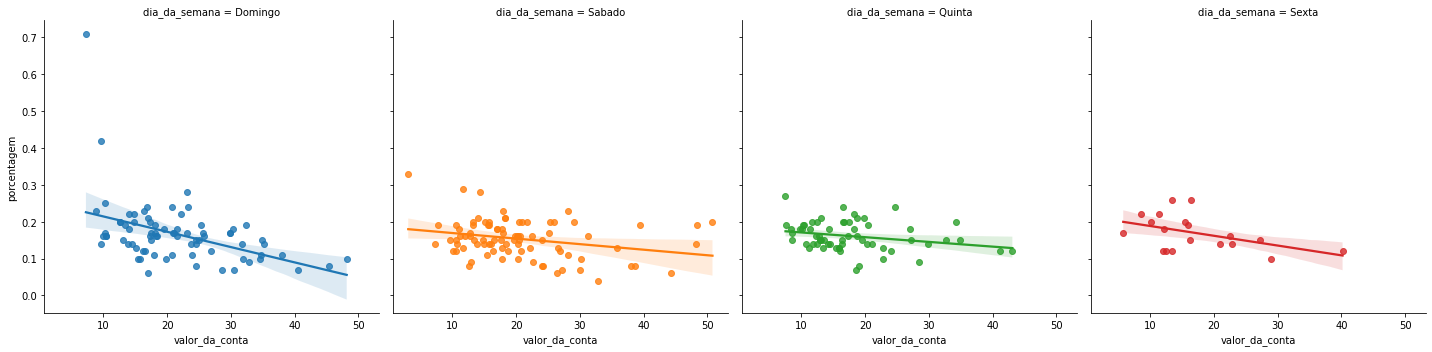

In [55]:
temp = sns.lmplot(x='valor_da_conta',y='porcentagem',hue='dia_da_semana',col='dia_da_semana',data=gorjetas)

In [56]:
media_gorjetas = gorjetas.gorjeta.mean()

In [58]:
gorjetas.groupby(['dia_da_semana']).mean()[['valor_da_conta','gorjeta','porcentagem']]

,valor_da_conta,gorjeta,porcentagem
dia_da_semana,,,
Domingo,21.410000,3.255132,0.166974
Quinta,17.682742,2.771452,0.161129
Sabado,20.441379,2.993103,0.153678
Sexta,17.151579,2.734737,0.169474


In [59]:
gorjetas.dia_da_semana.value_counts()

Sabado     87
Domingo    76
Quinta     62
Sexta      19
Name: dia_da_semana, dtype: int64

### Teste de hipótese


* Hnull -  A dsistribuição do valor da conta é igual no sábado e no domingo

* Halt -  A dsistribuição do valor da conta não é igual no sábado e no domingo

* Para a hipótese alternativa ser aceita o "pvalue" deverá ser igual ou menor a 0.05

In [63]:
domingo = gorjetas.query('dia_da_semana == "Domingo"').valor_da_conta

In [64]:
sabado = gorjetas.query('dia_da_semana == "Sabado"').valor_da_conta

19     20.65
20     17.92
21     20.29
22     15.77
23     39.42
       ...  
238    35.83
239    29.03
240    27.18
241    22.67
242    17.82
Name: valor_da_conta, Length: 87, dtype: float64

In [68]:
r2 = ranksums(domingo,sabado)

In [69]:
print(f'O valor do p-value é {r2.pvalue}')

O valor do p-value é 0.3576728477868443


## Análise 4 - Hora do dia

In [70]:
gorjetas.hora_do_dia.unique()

array(['Jantar', 'Almoço'], dtype=object)

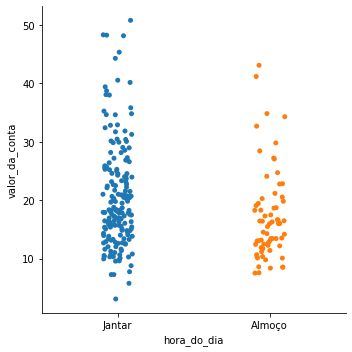

In [71]:
temp = sns.catplot(x='hora_do_dia',y='valor_da_conta',data=gorjetas)

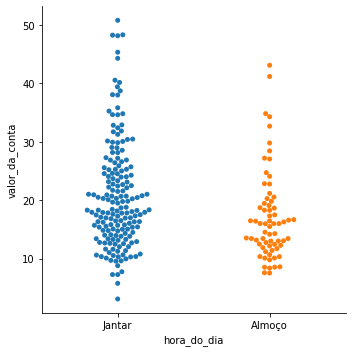

In [73]:
temp = sns.catplot(x='hora_do_dia',y='valor_da_conta',kind='swarm',data=gorjetas)

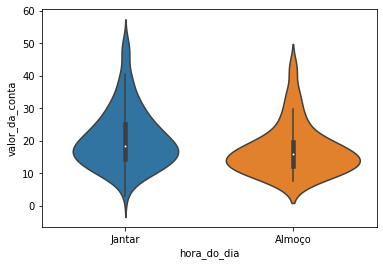

In [75]:
temp = sns.violinplot(x='hora_do_dia',y='valor_da_conta',data=gorjetas)

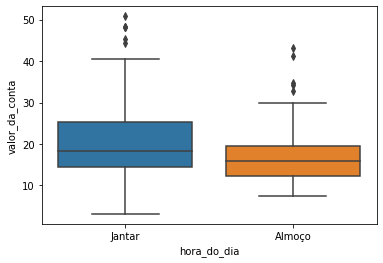

In [76]:
temp = sns.boxplot(x='hora_do_dia',y='valor_da_conta',data=gorjetas)

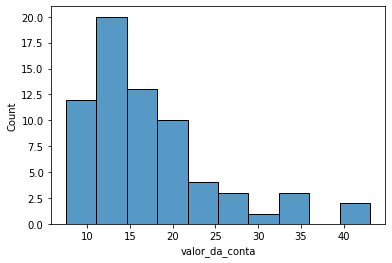

In [82]:
almoco = gorjetas.query('hora_do_dia == "Almoço"').valor_da_conta
temp = sns.histplot(almoco)

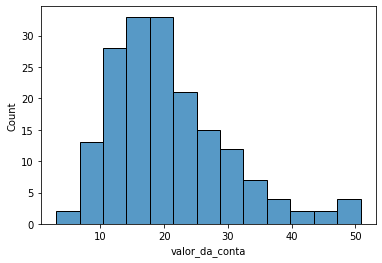

In [81]:
jantar = gorjetas.query('hora_do_dia == "Jantar"').valor_da_conta
temp = sns.histplot(jantar)

### Teste de hipótese


* Hnull -  A distribuição do valor da conta é igual no alomoço e na janta

* Halt -  A distribuição do valor da conta não é igual no alomoço e na janta

* Para a hipótese alternativa ser aceita o "pvalue" deverá ser igual ou menor a 0.05

In [83]:
r3 = ranksums(almoco,jantar)

In [84]:
print(f'O valor do p-value é {r3.pvalue}') # Será aceitada a hipótese alternativa

O valor do p-value é 0.0011791039723641672


* Relacionado a porcetagem e hora do dia

In [85]:
p_jantar = gorjetas.query('hora_do_dia == "Jantar"').porcentagem
p_almoco = gorjetas.query('hora_do_dia == "Almoço"').porcentagem

r3 = ranksums(p_almoco,p_jantar)
print(f'O valor do p-value é {r3.pvalue}')

O valor do p-value é 0.2602493995587126


In [86]:
[1,2,3] * 3

[1, 2, 3, 1, 2, 3, 1, 2, 3]